In [1]:
import pandas as pd

In [2]:
path = './data/18-10-29_names.csv'

In [3]:
df = pd.read_csv(path, sep='\\')

In [4]:
df = df.rename(columns={"frame.time_relative": "time",
                        "_ws.col.Protocol": "protocol",
                        "frame.len": "len",
                        "_ws.col.Info": "info"})

In [106]:
df.head()

,time,eth.src,eth.src_resolved,eth.dst,eth.dst_resolved,ip.src,ip.src_host,ip.dst,ip.dst_host,protocol,len,info
0,0.000000,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,192.168.1.1,192.168.1.1,DNS,75,Standard query 0x00e2 A tunnel.xbcs.net
1,0.002010,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,91,Standard query response 0x00e2 A tunnel.xbcs.n...
2,0.002049,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,91,Standard query response 0x00e2 A tunnel.xbcs.n...
3,0.009122,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,174.129.217.97,174.129.217.97,TCP,74,4833 → 3478 [SYN] Seq=0 Win=5840 Len=0 MSS=146...
4,0.172947,30:8c:fb:2f:e4:b2,Dropcam_2f:e4:b2,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.106,192.168.1.106,35.188.0.57,35.188.0.57,TLSv1,156,"Application Data, Application Data"


<AxesSubplot:>

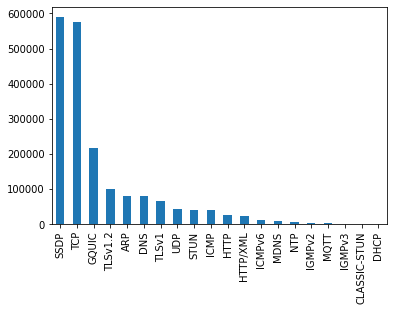

In [6]:
df['protocol'].value_counts()[:20].plot(kind='bar')

In [81]:
ip_sources = df['ip.src'].value_counts()
len(ip_sources)

360

<AxesSubplot:>

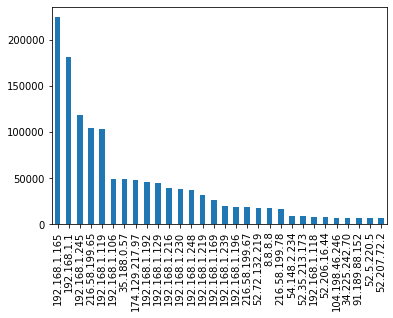

In [86]:
ip_sources[:30].plot(kind='bar')

In [84]:
ip_destinations = df['ip.dst'].value_counts()
len(ip_destinations)

377

<AxesSubplot:>

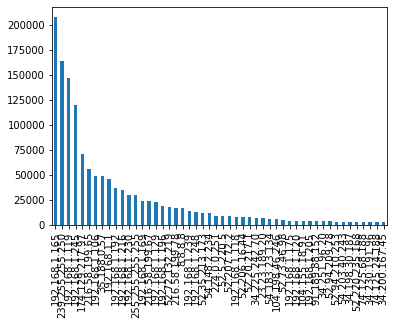

In [85]:
ip_destinations[:50].plot(kind='bar')

In [18]:
len(df['eth.src'].value_counts())

28

<AxesSubplot:>

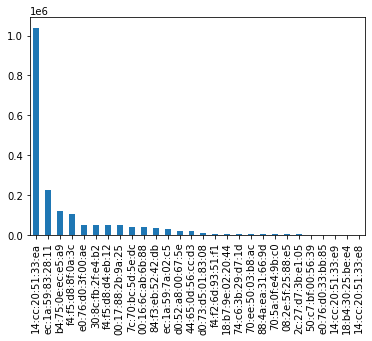

In [9]:
df['eth.src'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

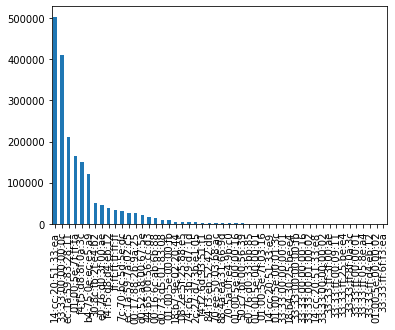

In [10]:
df['eth.dst'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

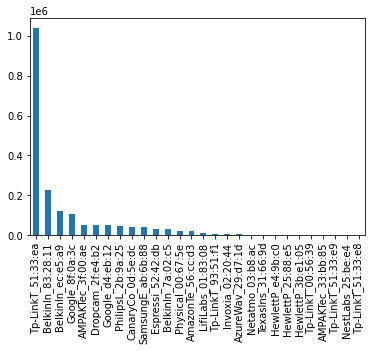

In [11]:
df['eth.src_resolved'].value_counts()[:50].plot(kind='bar')

<AxesSubplot:>

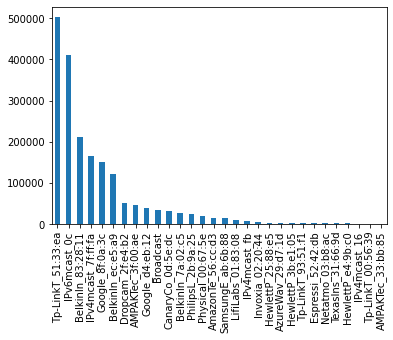

In [12]:
df['eth.dst_resolved'].value_counts()[:30].plot(kind='bar')

In [13]:
df['ip.dst'].value_counts()

192.168.1.165      207760
239.255.255.250    164509
192.168.1.119      147310
192.168.1.245      119613
174.129.217.97      70906
                    ...  
150.101.112.134         1
192.146.137.13          1
193.2.78.228            1
5.200.6.34              1
178.63.9.110            1
Name: ip.dst, Length: 377, dtype: int64

Next: check the packet that raised a warning when running tshark (1479336)

mac name resolution

### Packets that raise a warning when running tshark

In [14]:
df.iloc[1479335]

time                                                          66329.1
eth.src                                             00:17:88:2b:9a:25
eth.src_resolved                                    PhilipsL_2b:9a:25
eth.dst                                             14:cc:20:51:33:ea
eth.dst_resolved                                    Tp-LinkT_51:33:ea
ip.src                                                  192.168.1.129
ip.src_host                                             192.168.1.129
ip.dst                                                  130.211.67.12
ip.dst_host                                             130.211.67.12
protocol                                                         HTTP
len                                                               767
info                POST /bridges/fullconfig?sso=332e252d3b35d28a7...
Name: 1479335, dtype: object

In [15]:
df.iloc[1479335]['info']

'POST /bridges/fullconfig?sso=332e252d3b35d28a7e76a9faee142223e84f6578bd541b2b77a392a0ded4ef161b717eaf66da2b1256b93213e31364fedc23c944472c081832f02878b81abcd8acf21eb652373b6d2049571000c64cad080547f708e8146d3f543855fd6b1fe01bd45b0612666792ce63247e2f232b62bb15213d2999dc985e39ce6166ad61e59c31&i=f9cb1ac3c5e1e68956445eccab284cf2&auth=8f553d46f86ebc378cd53d0965c27a096a3c3c8c HTTP/1.1 [Dissector bug, protocol HTTP: epan/packet.c:761: failed assertion saved_layers_len < 500"][Dissector bug, protocol HTTP: epan/packet.c:761: failed assertion "saved_layers_len < 500"]"'

Seems like the info column is too long (>500)

### Now we try to split the dataset based on IP addresses of the IoT devices

#### Top 30 source private IP addresses

<AxesSubplot:>

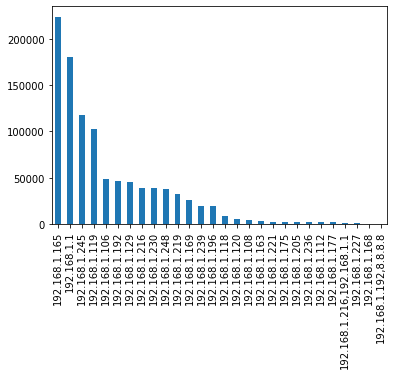

In [123]:
ip_sources[ip_sources.index.str.startswith('192.168.')][:30].plot(kind='bar')

#### Top 30 source public IP addresses

<AxesSubplot:>

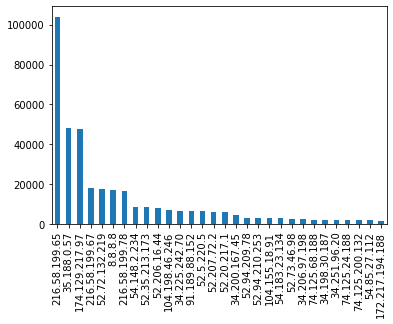

In [124]:
ip_sources[~ ip_sources.index.str.startswith('192.168.')][:30].plot(kind='bar')

#### 192.168.1.118 is a random IoT device, try to understand with who it communicates in the LAN

In [129]:
df[df['ip.src'] == '192.168.1.118']['eth.src_resolved'].value_counts()

LifiLabs_01:83:08    8042
Name: eth.src_resolved, dtype: int64

192.168.1.118 is probably a LIFX smart lamp (its MAC address is from Lifilabs).

In [132]:
df[df['ip.dst'] == '192.168.1.118']['eth.src_resolved'].value_counts()

Tp-LinkT_51:33:ea    7950
Name: eth.src_resolved, dtype: int64

It looks like the device with MAC 51:33:ea is the router, of the brand TP-Link

In [119]:
destinations = df[df['ip.src'] == '192.168.1.118']['ip.dst']
destinations

464        104.198.46.246
466        104.198.46.246
831        104.198.46.246
932               8.8.8.8
933           192.168.1.1
                ...      
1919963    104.198.46.246
1920915    104.198.46.246
1920921    104.198.46.246
1920927     192.168.1.255
1920928    104.198.46.246
Name: ip.dst, Length: 8042, dtype: object

In [122]:
destinations[destinations.str.startswith('192.168.')].value_counts()

192.168.1.255    1775
192.168.1.1       302
Name: ip.dst, dtype: int64

There are only 2 LAN IP destinations for 192.168.1.118: 192.168.1.1 and 192.168.1.255 (I think these are the router private IP address and the LAN broadcast IP address)

In [136]:
df[(df['ip.src'] == '192.168.1.118') & (df['ip.dst'] == '192.168.1.1')]['protocol'].value_counts()

DNS     298
DHCP      4
Name: protocol, dtype: int64

As we can see this communication was only used for DNS and DHCP

In [137]:
df[(df['ip.src'] == '192.168.1.118') & (df['ip.dst'] == '192.168.1.255')]['protocol'].value_counts()

UDP             1186
ADwin Config     589
Name: protocol, dtype: int64

???

In [142]:
destinations[~ destinations.str.startswith('192.168.')].value_counts()

104.198.46.246     5372
8.8.8.8             298
13.55.50.68          18
103.214.220.220      16
103.38.120.36        15
                   ... 
5.200.6.34            1
204.2.134.162         1
212.18.3.18           1
103.100.31.24         1
150.101.112.134       1
Name: ip.dst, Length: 69, dtype: int64

As we can see, 192.168.1.118 mainly communicates with 104.198.46.246

According to a reverse IP lookup, the latter is owned by Google.

#### Now try to extract the traffic related to 192.168.1.118

In [138]:
df[(df['ip.src'] == '192.168.1.118') | (df['ip.dst'] == '192.168.1.118') | (df['ip.dst'] == '255.255.255.255')]
# Note that we should also include multicasts that comprise 192.168.1.118, and broadcast

,time,eth.src,eth.src_resolved,eth.dst,eth.dst_resolved,ip.src,ip.src_host,ip.dst,ip.dst_host,protocol,len,info
226,2.240297,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
267,5.234390,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
288,8.234473,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
418,11.234358,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
441,14.234463,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
...,...,...,...,...,...,...,...,...,...,...,...,...
1920949,86385.197133,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
1920980,86388.195877,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
1921014,86391.197181,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175
1921025,86394.197228,84:f3:eb:52:42:db,Espressi_52:42:db,ff:ff:ff:ff:ff:ff,Broadcast,192.168.1.219,192.168.1.219,255.255.255.255,255.255.255.255,UDP,217,49154 → 6666 Len=175


#### LAN packets

In [113]:
df[df['ip.src'].str.startswith('192.168.') & df['ip.dst'].str.startswith('192.168.')]
# Note that we should also include other private prefixes than 192.168.

,time,eth.src,eth.src_resolved,eth.dst,eth.dst_resolved,ip.src,ip.src_host,ip.dst,ip.dst_host,protocol,len,info
0,0.000000,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,192.168.1.1,192.168.1.1,DNS,75,Standard query 0x00e2 A tunnel.xbcs.net
1,0.002010,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,91,Standard query response 0x00e2 A tunnel.xbcs.n...
2,0.002049,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,91,Standard query response 0x00e2 A tunnel.xbcs.n...
8,0.363936,7c:70:bc:5d:5e:dc,CanaryCo_0d:5e:dc,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.230,192.168.1.230,192.168.1.1,192.168.1.1,DNS,74,Standard query 0x5163 A b.canaryis.com
9,0.402380,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,7c:70:bc:5d:5e:dc,CanaryCo_0d:5e:dc,192.168.1.1,192.168.1.1,192.168.1.230,192.168.1.230,DNS,395,Standard query response 0x5163 A b.canaryis.co...
...,...,...,...,...,...,...,...,...,...,...,...,...
1921056,86394.970772,ec:1a:59:83:28:11,BelkinIn_83:28:11,b4:75:0e:ec:e5:a9,BelkinIn_ec:e5:a9,192.168.1.165,192.168.1.165,192.168.1.245,192.168.1.245,TCP,66,49152 → 37105 [ACK] Seq=195 Ack=340 Win=5792 L...
1921079,86396.412855,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,192.168.1.1,192.168.1.1,DNS,68,Standard query 0x025a A xbcs.net
1921080,86396.413254,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,ec:1a:59:83:28:11,BelkinIn_83:28:11,192.168.1.1,192.168.1.1,192.168.1.165,192.168.1.165,DNS,84,Standard query response 0x025a A xbcs.net A 18...
1921086,86397.421216,ec:1a:59:83:28:11,BelkinIn_83:28:11,14:cc:20:51:33:ea,Tp-LinkT_51:33:ea,192.168.1.165,192.168.1.165,192.168.1.1,192.168.1.1,DNS,75,Standard query 0x025b A tunnel.xbcs.net


In [114]:
ip_destinations[ip_destinations.index.str.startswith('192.168.')]
# Note the bug with some address fields that contain 2 addresses

192.168.1.165                  207760
192.168.1.119                  147310
192.168.1.245                  119613
192.168.1.106                   48328
192.168.1.1                     45458
192.168.1.192                   36624
192.168.1.216                   34834
192.168.1.230                   30019
192.168.1.169                   23698
192.168.1.129                   22384
192.168.1.196                   18240
192.168.1.239                   13977
192.168.1.248                   12341
192.168.1.118                    7950
192.168.1.175                    3887
192.168.1.120                    3606
192.168.1.205                    3450
192.168.1.163                    2243
192.168.1.255                    2011
192.168.1.112                    1741
192.168.1.221                    1600
192.168.1.108                    1580
192.168.1.219                    1457
192.168.1.165,129.132.2.21       1338
192.168.1.1,192.168.1.216        1248
192.168.1.236                    1060
192.168.1.17

In [115]:
ip_sources[ip_sources.index.str.startswith('192.168.')]

192.168.1.165                224561
192.168.1.1                  180855
192.168.1.245                118102
192.168.1.119                102748
192.168.1.106                 48330
192.168.1.192                 46107
192.168.1.129                 45037
192.168.1.216                 39215
192.168.1.230                 38314
192.168.1.248                 37072
192.168.1.219                 31702
192.168.1.169                 25600
192.168.1.239                 19120
192.168.1.196                 18823
192.168.1.118                  8042
192.168.1.120                  4800
192.168.1.108                  4132
192.168.1.163                  3019
192.168.1.221                  2292
192.168.1.175                  2220
192.168.1.205                  1994
192.168.1.236                  1665
192.168.1.112                  1612
192.168.1.177                  1385
192.168.1.216,192.168.1.1      1248
192.168.1.227                  1221
192.168.1.168                   104
192.168.1.192,8.8.8.8       